# Réduction de dimension - Principal Component Analysis (PCA)
---
## 1 Formulation mathématique
### 1.1 Enonciation du problème

#### 1.1.1 Définition du dataset

On considère un dataset de $p$ variables $X \in \mathcal{M}_{n,p}(\mathbb{R})$ tel que : 

$$
X = \begin{bmatrix}
    x_1 & \dots & x_p
    \end{bmatrix} \quad (x_i)_{i \in \{1,p\}}  \in \mathbb{R}^p, \quad \text{i.e.,} \quad
X = \begin{bmatrix}
    x_{1,1} & \dots & x_{1,p} \\
    \vdots & x_{i,n} & \vdots \\
    x_{n,1} & \dots & x_{n,p} \\
   \end{bmatrix} \in \mathcal{M}_{n,p}(\mathbb{R})
$$

On souhaite transformer ce dataset de $p$ variables contenant les features $x_i$ en $k$ variables $z_i$, $k < p$ qui maximise la variance. On cherche donc la transformation $f$ tel que :

$$
f : \mathcal{M}_{n,p}(\mathbb{R}) \quad \longrightarrow \quad \mathcal{M}_{n,k}(\mathbb{R}), \quad k < p 
$$

$$
X = \begin{bmatrix}
    x_{1,1} & \dots & x_{1,p} \\
    \vdots & x_{i,n} & \vdots \\
    x_{n,1} & \dots & x_{n,p} \\
   \end{bmatrix} 
   \quad \longrightarrow \quad
Z = \begin{bmatrix}
    z_{1,1} & \dots & z_{1,k} \\
    \vdots & x_{i,n} & \vdots \\
    z_{n,1} & \dots & z_{n,k} \\
   \end{bmatrix}
$$

#### 1.1.2 Un problème d'optimisation

**L'objectif est de trouver une telle application $f$ qui minimise l'erreur de reconstruction**. En passant d'un dataset de dimension $n$ à $r$, $r <n$ :

$$
\min_{u_i, u_j} \sum_{i=1}^{n} || x_i - \sum_{j=1}^{r}z_iu_j ||_2^2 = \min_{u_i, u_j} \sum_{i=1}^{n} || x_i - \sum_{j=1}^{r}(u_j^Tx_i)u_j ||_2^2
$$

sous contraintes : $u_i^Tu_j = \delta_{i,j}$ avec $\delta_{i,j}$ le delta de Kronecker. Soit pour $Z = XU \Longleftrightarrow X' = ZU^T, x' = UU^Tx$ en notation matricielle :

$$
\boxed{
\min_{U \in \mathcal{M}_{p,r}} \sum_{i=1}^{n} || x_i - UU^Tx_i ||_2^2, \quad U = [u_1, \dots, u_r], \quad u_i \in \mathbb{R}^p
}
$$

sous contraintes $UU^T = I$

**On prend $X$ normalisé (centré réduit), i.e.**

$$
x_{i,j}' = \frac{x_{i,j} - \mu_j}{\sigma_j} \quad \text{soit} \quad X' = (X - \mathcal{1}\mu^T)D^{-1}   
$$

#### 1.1.3 Le problème de Rayleigh

Le calcul de la norme $|| x_i - UU^Tx_i ||_2^2$ ramène le problème d'optimisation sous contraintes à un problème de Rayleigh, en effet : 

$$
\begin{align}
    || x_i - UU^Tx_i ||_2^2 &= (x_i - UU^Tx_i)(x_i - UU^Tx_i) \\
                            &= (x_i^T - x_i^TUU^T)(x_i - UU^T) \\
                            &= x_i^Tx_i - x_i^TUU^Tx_i - x_i^TUU^Tx_i + x_i^TUU^TUU^Tx_i \\
                            &= x_i^Tx_i - x_i^TUU^Tx_i - x_i^TUU^Tx_i + x_i^TUU^Tx_i \\
                            &= x_i^Tx_i - x_i^TUU^Tx_i \\
                            &= x_i^Tx_i - (U^Tx_i)^T(U^Tx_i) \\
                            &= x_i^Tx_i - || U^Tx_i ||_2^2 \\
    || x_i - UU^Tx_i ||_2^2 &= x_i^Tx_i - \sum_{j=1}^k (U_j^Tx_i)^2
\end{align}
$$

---
On définit la matrice de covariance par :

$$
\Sigma = \frac{1}{n-1}
\begin{bmatrix}
r_{1,1} & \dots & r_{1,n} \\
\vdots & r_{i,j} & \vdots \\
r_{n,1} & \dots & r_{n,n} \\
\end{bmatrix}
$$

avec les $(r_{i,j})_{i, j \in \mathbb{N} \times \mathbb{N}}$ les coefficients de corrélation tels que :

$$
r_{i,j} = \text{Corr}(X_i,X_j) = \frac{\text{Cov}(X_i, X_j)}{\sigma_{X_{i}} \sigma_{X_{j}}} \quad \forall i, j \in \mathbb{N} \times \mathbb{N}
$$

avec $\text{Cov}(X_i, X_j) = \mathbb{E}[(X_i - \mathbb{E}(X_i))(X_j - \mathbb{E}(X_j))]$. Pour des échantillons $\{(x_i^n,x_j^n) | n \in \mathbb{N}\}$, un estimateur du coefficient de corrélation de $r_{i,j}$ noté $\hat{r_{i,j}}$ est donné par les relations suivantes

$$
r_{i,j} = \frac{\sigma_{X_i,X_j}}{\sigma_{X_{i}} \sigma_{X_{j}}}
$$

avec : 

$$
\hat{\sigma}_{X,Y} = \frac{1}{N}\sum_{k=1}^{N}(x_i - \bar{x})(y_i - \bar{y}), \quad \hat{\sigma}_{S} = \sqrt{\frac{1}{N}\sum_{k=1}^{N}(s_i - \bar{s})²}, \quad \bar{s} = \frac{1}{N}\sum_{k=1}^{N}s_i, \quad S = X \quad \text{ou} \quad S = Y
$$

---
Le problème d'optimisation se ramène donc à :

$$
\boxed{
\min_{U \in \mathbb{R}^{p \times r}} \sum_{i=1}^{n} || x_i - UU^Tx_i ||_2^2 \Longleftrightarrow \max_{U \in \mathbb{R}^{p \times r}} \sum_{i=1}^{n}\sum_{j=1}^{r} (U_j^Tx_i)²
}
$$

#### 1.1.4 Autre approche

<div align="center">
  <img src="src/pics/PCA/pca_composantes.png" alt="a" width="550" height="500">
</div>

On cherche à maximiser la variance, i.e. trouver :

$$
\max_{||u|| = 1}\mathbb{V}(Xu) = \max_{||u|| = 1} u^T\Sigma u
$$

d'ou la solution du problème de Rayleigh: $\Sigma u = \lambda u$

#### 1.1.5 Première composante

On cherche à trouver la première composante $z_1 = c_1 = Xu_1$. On se ramène à :

$$
\max_{u_1 \in \mathbb{R}^{p}} \sum_{i=1}^{n}\sum_{j=1}^{r} (u_1^Tx_i)²
$$

sous contraintes $u_1^Tu_1 = 1$. On calcule le gradient du Lagrangien :

$$
\begin{align}
\nabla \mathcal{L}(u_1, \lambda) &= \nabla (u_1 \Sigma u_1^T - \lambda(u_1u_1^T - 1)) \\
                                 &= 2 \Sigma u_1 - 2\lambda u_1
\end{align}
$$

$$
\nabla \mathcal{L}(u_1, \lambda) = 0 \Longleftrightarrow \Sigma u_1 = \lambda u_1 
$$

$u_1$ est vecteur propre de $\Sigma$ et $\lambda$ valeur propre associée. **Plus $\lambda$ est grand, moins l'erreur de reconstruction est grande**.

#### 1.1.5 Autres composantes

On a $c_j = Xu_j$. Pour les $u_j$, les résidus sont : 

$$
R = (X - Xu_1u_1^T)
$$

$$
\begin{align}
    u_2^TRR^Tu_2 &= ...
\end{align}
$$

pour $u_2^TRR^Tu_2 = U_2^TSU_2$, comme la valeur propre $\lambda_1$ est déjà prise, on prend la deuxième plus grande valeur propre de $\Sigma$ et ainsi de suite... 

#### 1.1.6 Choix du nombre d'axes (nombre de composantes)

On utilise le pourcentage d'inertie exmpliquée :

$$
\frac{\sum_{j=1}^{k} \lambda_j }{\sum_{j=1}^{p} \lambda_j} = \frac{\sum_{j=1}^{k} \lambda_j }{\text{Tr}(S)}
$$

## 2 Des exemples en Python
---
#### 2.1 Import des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sns.set(style="whitegrid")

#### 2.2 Génération du jeu de données

Ici, on s'intéresse à un jeu de données fictif ou l'on retrouve les notes en mathématiques, physique, informatique, SVT, français et anglais d'élèves d'une classe. Le but est de faire une analyse des composantes principales en deux dimensions pour l'interprétabilité. 

In [3]:
np.random.seed(1)
n = 70

S = np.random.normal(0, 1, n)   # scientifique
L = np.random.normal(0, 1, n)   # littéraire


data = {
    "Maths":        14 + 3.0*S + 0.2*L + np.random.normal(0, 0.8, n),
    "Physique":     13 + 2.8*S + 0.1*L + np.random.normal(0, 0.8, n),
    "Informatique": 15 + 2.5*S + 0.3*L + np.random.normal(0, 0.8, n),
    "SVT":          13 + 2.0*S + 0.4*L + np.random.normal(0, 0.8, n),
    "Français":     12 + 0.2*S + 3.0*L + np.random.normal(0, 0.8, n),
    "Anglais":      12 + 0.4*S + 2.6*L + np.random.normal(0, 0.8, n),
}

df = pd.DataFrame(data)
df.head()

,Maths,Physique,Informatique,SVT,Français,Anglais
0,18.434958,17.142556,18.002100,16.479147,7.809515,8.810766
1,11.982441,10.162495,12.969262,12.310715,11.654940,10.947843
2,13.142601,12.428629,13.803922,11.851625,12.074633,11.872950
3,11.556657,9.614086,13.317589,11.848845,13.813937,14.210409
4,17.082922,14.465222,17.306810,14.295994,14.763686,11.903489


#### 2.3 Traitement du jeu de données

Comme évoqué précédement, il faut normaliser les données 

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

#### 2.4 Entraînement du modèle

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

explained_var = pca.explained_variance_ratio_ # Variance
print("Variance expliquée par les deux composantes :", explained_var)

Variance expliquée par les deux composantes : [0.61768868 0.31049972]


#### 2.5 Interprétation

On cherche à réduire la taille du *dataset*, en passant de 6 *features* à seulement 2. La PCA va donc regrouper les notes scientifiques et les notes litéraires.

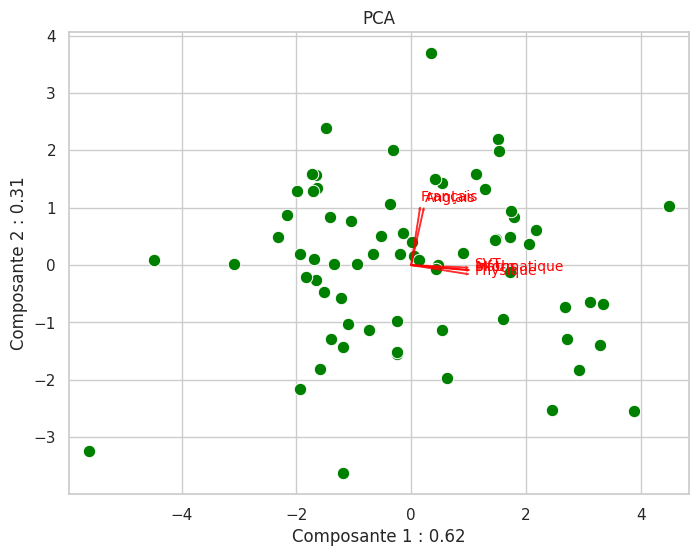

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], s=80, color='green')

plt.xlabel(f'Composante 1 : {explained_var[0]:.2f}')
plt.ylabel(f'Composante 2 : {explained_var[1]:.2f}')
plt.title('PCA')
plt.grid(True)

# Loadings (vecteurs)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
for i, col in enumerate(df.columns):
    plt.arrow(0, 0, loadings[i,0], loadings[i,1], color='red', alpha=0.7, width=0.01)
    plt.text(loadings[i,0]*1.15, loadings[i,1]*1.15, col, color='red', fontsize=10)

plt.axis('equal')
plt.show()

On peut supposer que les élèves qui ont les meilleures notes en sciences et les plus faibles en littérature sont représentés par des points en bas à droite (PC1), tandis que les élèves avec de meilleurs résultats en littérature mais pas en science sont représentées en haut à gauche (PC2).
Les meileurs élèves sont en haut à droite tandis que les élèves avec les moins bonne snotes partout sont en bas à gauche.

#### 2.6 Cas d'un élève en particulier

In [8]:
eleve_id = 10

print("Notes élève :")
print(df.iloc[eleve_id])

print("\nCoordonnées PCA de l'élève :")
print(f"PC1 (scientifique) = {X_pca[eleve_id,0]:.2f}")
print(f"PC2 (littéraire)   = {X_pca[eleve_id,1]:.2f}")


Notes de l'élève :
Maths           18.093765
Physique        18.365229
Informatique    18.439308
SVT             15.389289
Français        12.592202
Anglais         10.631274
Name: 10, dtype: float64

Coordonnées PCA de l'élève :
PC1 (scientifique) = 2.68
PC2 (littéraire)   = -0.73


#### 2.7 Enregistrement du modèle